Importing the Dependencies

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score



Loading the new dataset

In [12]:

Data = pd.read_csv('New_Dataset.csv')

In [13]:
# printing the first 5 rows of the dataset
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:

Data.shape

(768, 9)

In [15]:

Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
Data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [21]:
Data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [22]:
# separating the data and labels
X_data = Data.drop(columns = 'Outcome', axis=1)
y_data = Data['Outcome']

In [23]:
print(X_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [24]:
print(y_data)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X_data)

StandardScaler()

In [27]:
standardized_data = scaler.transform(X_data)

In [28]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [41]:
X_data = standardized_data
y_data = Data['Outcome']

In [42]:
print(X_data)
print(y_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size = 0.2, stratify=y_data, random_state=2)

In [101]:
print(X_data.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Developing The Model

1.Support Vector Classifier

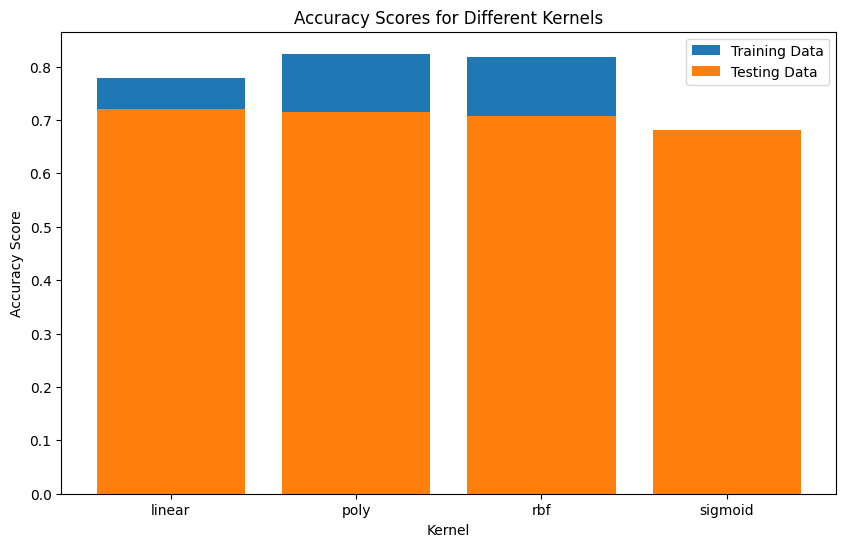

In [102]:


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
training_scores = []
testing_scores = []

for kernel in kernels:
    Model_SVC = svm.SVC(kernel=kernel, C=1, class_weight='balanced', gamma='scale', probability=True)
    Model_SVC.fit(X_train, Y_train)

    X_train_prediction = Model_SVC.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, y_train)
    training_scores.append(training_data_accuracy)

    X_test_prediction = Model_SVC.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, y_test)
    testing_scores.append(test_data_accuracy)

plt.figure(figsize=(10, 6))
plt.bar(kernels, training_scores, label='Training Data')
plt.bar(kernels, testing_scores, label='Testing Data')
plt.xlabel('Kernel')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Kernels')
plt.legend()
plt.show()

In [99]:
Model_SVC = svm.SVC(kernel='linear', C=1.0, class_weight='balanced', gamma='scale', probability=True)
Model_SVC.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True)

Support Vector Classifier: 0.7207792207792207
Random Forest: 0.7402597402597403
AdaBoost: 0.7467532467532467
Gradient Boosting: 0.7337662337662337


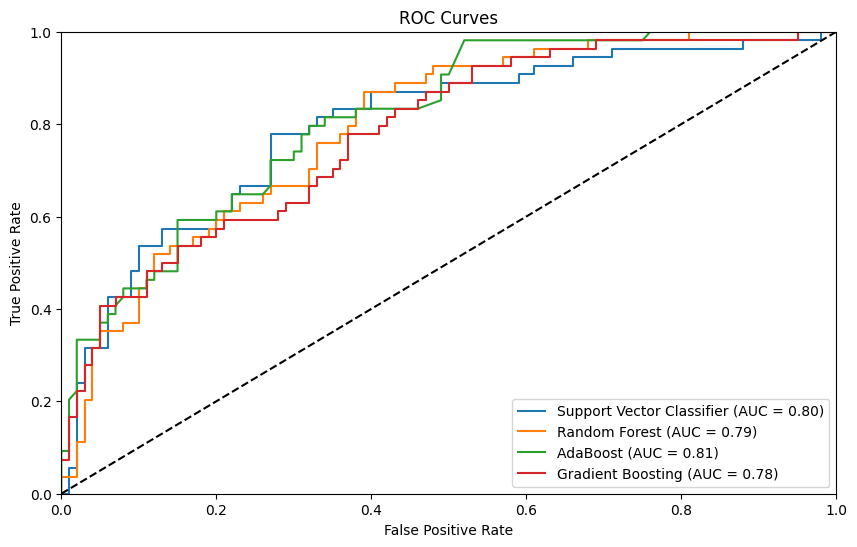

Best Model Accuracy: 0.7467532467532467


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Ensemble classification algorithms
Model_SVC = svm.SVC(kernel='linear', C=1.0, class_weight='balanced', gamma='scale', probability=True)
Model_RF = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
Model_AB = AdaBoostClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
Model_GB = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

# Train the models
Model_SVC.fit(X_train, y_train)
Model_RF.fit(X_train, y_train)
Model_AB.fit(X_train, y_train)
Model_GB.fit(X_train, y_train)

# Evaluate the models
y_pred_svm = Model_SVC.predict(X_test)
y_pred_rf = Model_RF.predict(X_test)
y_pred_ab = Model_AB.predict(X_test)
y_pred_gb = Model_GB.predict(X_test)

print("Support Vector Classifier:", accuracy_score(y_test, y_pred_svm))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))
print("AdaBoost:", accuracy_score(y_test, y_pred_ab))
print("Gradient Boosting:", accuracy_score(y_test, y_pred_gb))

# Plot ROC curves
plt.figure(figsize=(10, 6))
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, Model_SVC.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, Model_RF.predict_proba(X_test)[:,1])
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, Model_AB.predict_proba(X_test)[:,1])
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, Model_GB.predict_proba(X_test)[:,1])

plt.plot(fpr_svc, tpr_svc, label='Support Vector Classifier (AUC = {:.2f})'.format(roc_auc_score(y_test, Model_SVC.predict_proba(X_test)[:,1])))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, Model_RF.predict_proba(X_test)[:,1])))
plt.plot(fpr_ab, tpr_ab, label='AdaBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, Model_AB.predict_proba(X_test)[:,1])))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_score(y_test, Model_GB.predict_proba(X_test)[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Best model
best_model = Model_GB if accuracy_score(y_test, y_pred_gb) > accuracy_score(y_test, y_pred_rf) and accuracy_score(y_test, y_pred_gb) > accuracy_score(y_test, y_pred_ab) else Model_RF if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_ab) else Model_AB

# Test the model
y_pred = best_model.predict(X_test)

print("Best Model Accuracy:", accuracy_score(y_test, y_pred))

Out of the four models, we can clearly see that the `AdaBoost` model is good for our dataset. Hence this is the model I am going to choose for my predictions.

Making a Predictive System

In [105]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

Prediction = Model_AB.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\linco\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
